<a href="https://colab.research.google.com/github/victoregomezf-maker/seminario/blob/main/Predicci%C3%B3n_de_demanda_insumos_medicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICCION DE DEMANDA DE INSUMOS MEDICOS**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Configuración de gráficas
%matplotlib inline
sns.set_style("whitegrid")

print("✅ Paso 1: Librerías importadas.")

✅ Paso 1: Librerías importadas.


# **LIMPIEZA DE LOS DATOS Y ACOMODACION**

In [66]:
# 1. CARGAR EL ARCHIVO
ruta = "/content/DEMANDA AÑO 2025.csv"
df_raw = pd.read_csv(ruta, sep=';', header=None, encoding='latin-1')

resultados = []
i = 0
while i < len(df_raw):
    fila_actual = df_raw.iloc[i].astype(str).tolist()
    fila_texto = " ".join(fila_actual).upper()

    # Detectamos el encabezado del mes
    if "CANTIDAD DIARIA MES" in fila_texto:
        nombre_mes = fila_texto.split("MES")[-1].replace("DE", "").strip("- ").strip()
        fila_dias = [str(x).strip().replace('.0', '') for x in df_raw.iloc[i+1]]

        try:
            col_inicio_datos = fila_dias.index('1')
            j = i + 2
            while j < len(df_raw):
                datos_fila = df_raw.iloc[j].tolist()
                producto = str(datos_fila[0]).strip()

                if producto.lower() in ['nan', ''] or "CANTIDAD DIARIA" in producto.upper():
                    break

                for idx_col in range(col_inicio_datos, len(datos_fila)):
                    dia_label = fila_dias[idx_col]
                    if dia_label.isdigit():
                        try:
                            valor_celda = str(datos_fila[idx_col]).replace(',', '.').strip()
                            cantidad = float(valor_celda)
                        except:
                            cantidad = 0.0

                        resultados.append({
                            "Producto": producto,
                            "Mes": nombre_mes,
                            "Dia": int(dia_label),
                            "Cantidad": cantidad
                        })
                j += 1
            i = j
        except ValueError:
            i += 1
    else:
        i += 1

# CREAR TABLA FINAL
df_final = pd.DataFrame(resultados)

print("✅ Paso 2: Análisis exitoso. Datos organizados.")
# Mostramos la tabla organizada para tu revisión
display(df_final.head(20))

✅ Paso 2: Análisis exitoso. Datos organizados.


,Producto,Mes,Dia,Cantidad
0,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,1,1.0
1,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,2,0.0
2,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,3,1.0
3,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,4,1.0
4,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,5,0.0
5,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,6,1.0
6,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,7,1.0
7,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,8,2.0
8,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,9,0.0
9,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,10,2.0


# **VERIFICACION DE LOS DATOS**

In [67]:
# 1. Verificar meses únicos
meses_detectados = df_final['Mes'].unique()
print(f"--- REVISIÓN DE MESES ---")
print(f"Meses encontrados ({len(meses_detectados)}): {meses_detectados}")

# 2. Resumen por mes para ver si están completos
resumen = df_final.groupby('Mes').agg(
    Total_Productos=('Producto', 'nunique'),
    Suma_Total_Demanda=('Cantidad', 'sum')
).reset_index()

print("\n--- RESUMEN DE DATOS POR MES ---")
display(resumen)

if len(meses_detectados) >= 10:
    print("\n✅ ¡Los 10 meses están presentes y la tabla está lista!")
else:
    print("\n⚠️ ALERTA: No se detectaron todos los meses. Revisa los títulos del archivo.")

--- REVISIÓN DE MESES ---
Meses encontrados (10): ['FEBRERO  NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN'
 'MARZO  NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN'
 'ABRIL  NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN'
 'MAYO  NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN'
 'JUNIO  NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN'
 'JULIO  NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN'
 'AGOSTO  NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN'
 'SEPTIEMBRE  NAN NAN NAN NAN NAN NAN 

,Mes,Total_Productos,Suma_Total_Demanda
0,ABRIL NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN...,207,325347.0
1,AGOSTO NAN NAN NAN NAN NAN NAN NAN NAN NAN NA...,176,189158.0
2,FEBRERO NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,154,241681.0
3,JULIO NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN...,214,343257.0
4,JUNIO NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN...,202,407528.0
5,MARZO NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN...,174,331286.0
6,MAYO NAN NAN NAN NAN NAN NAN NAN NAN NAN NAN ...,181,406166.0
7,NOVIEMBRE NAN NAN NAN NAN NAN NAN NAN NAN NAN...,232,440611.0
8,OCTUBRE NAN NAN NAN NAN NAN NAN NAN NAN NAN N...,209,387005.0
9,SEPTIEMBRE NAN NAN NAN NAN NAN NAN NAN NAN NA...,248,383691.0



✅ ¡Los 10 meses están presentes y la tabla está lista!


# **PREPARACION DE LOS DATOS**

In [72]:
# 1. LIMPIEZA AGRESIVA DE TEXTO EN MESES
# Tomamos solo la primera palabra (ej: de 'FEBRERO NAN NAN' dejamos solo 'FEBRERO')
df_final['Mes'] = df_final['Mes'].astype(str).str.split().str[0].str.strip().str.upper()

# 2. Mapeo cronológico (Asegurando que coincida con el texto limpio)
meses_orden = {
    'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4, 'MAYO': 5, 'JUNIO': 6,
    'JULIO': 7, 'AGOSTO': 8, 'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12
}
df_final['Month_Num'] = df_final['Mes'].map(meses_orden)

# 3. Limpieza de Cantidad (Convertir a número y quitar NaN)
df_final['Cantidad'] = pd.to_numeric(df_final['Cantidad'], errors='coerce').fillna(0)

# 4. Crear Fecha y Nombre del Día (Ahora sí funcionará porque el mes está limpio)
df_final['Fecha'] = pd.to_datetime(dict(year=2025, month=df_final.Month_Num, day=df_final.Dia), errors='coerce')
df_final['Day_Name'] = df_final['Fecha'].dt.day_name()

print("✅ Paso 4: ¡Limpieza total! Ya no debe haber NAN en los nombres ni NaT en las fechas.")
display(df_final[['Producto', 'Mes', 'Fecha', 'Day_Name', 'Cantidad']].head(10))

✅ Paso 4: ¡Limpieza total! Ya no debe haber NAN en los nombres ni NaT en las fechas.


,Producto,Mes,Fecha,Day_Name,Cantidad
0,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-01,Saturday,1.0
1,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-02,Sunday,0.0
2,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-03,Monday,1.0
3,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-04,Tuesday,1.0
4,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-05,Wednesday,0.0
5,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-06,Thursday,1.0
6,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-07,Friday,1.0
7,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-08,Saturday,2.0
8,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-09,Sunday,0.0
9,00031P - ELECTRODO ADULTO REF. 0651 30 77007 D...,FEBRERO,2025-02-10,Monday,2.0


# **EDA - ANALISIS DE FRECUENCIA PARA LA DEMANDA QUE ES DOS VECES POR SEMANA**

/tmp/ipython-input-154245524.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot_semanal, x='Day_Name', y='Cantidad',
/tmp/ipython-input-154245524.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot_semanal, x='Day_Name', y='Cantidad',


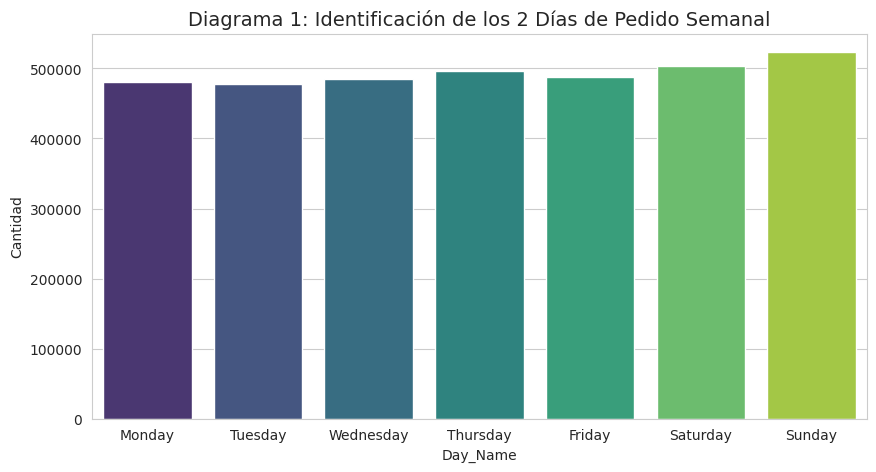

In [73]:
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 5))
# Eliminamos filas que pudieron quedar con error antes de graficar
df_plot_semanal = df_final.dropna(subset=['Fecha', 'Day_Name'])

sns.barplot(data=df_plot_semanal, x='Day_Name', y='Cantidad',
            order=dias_semana, estimator=sum, ci=None, palette='viridis')

plt.title('Diagrama 1: Identificación de los 2 Días de Pedido Semanal', fontsize=14)
plt.show()

# **EDA - ANALISIS DE ESTACIONALIDAD MENSUAL**

/tmp/ipython-input-4176803727.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_final, x='Month_Num', y='Cantidad', estimator=sum, ci=None, marker='o', color='red')


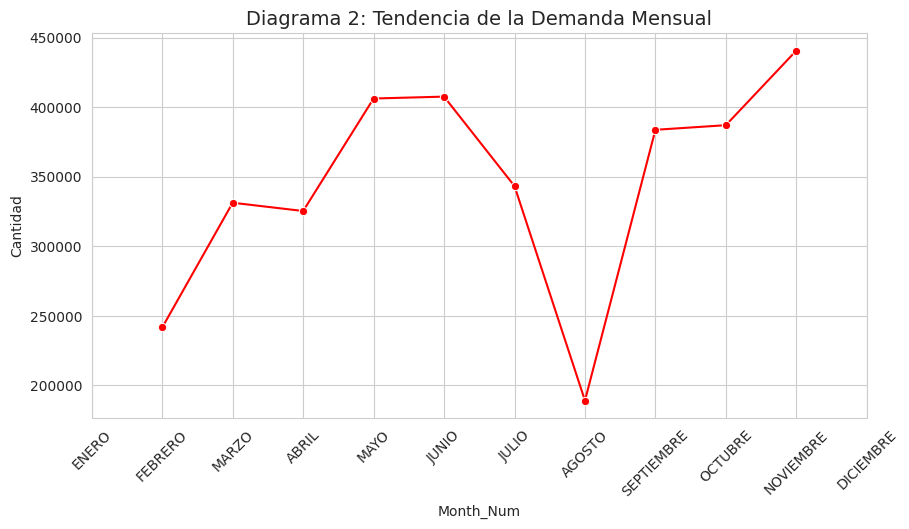

In [74]:
plt.figure(figsize=(10, 5))
# Graficamos usando el número del mes para que salga en orden (2, 3, 4...)
sns.lineplot(data=df_final, x='Month_Num', y='Cantidad', estimator=sum, ci=None, marker='o', color='red')

plt.title('Diagrama 2: Tendencia de la Demanda Mensual', fontsize=14)
plt.xticks(ticks=list(meses_orden.values()), labels=list(meses_orden.keys()), rotation=45)
plt.show()

# **EDA - DISPERSION Y OUTLIERS (BOXPLOT)**

/tmp/ipython-input-1178730688.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final[df_final['Cantidad'] > 0], x='Mes', y='Cantidad', palette='Set3')


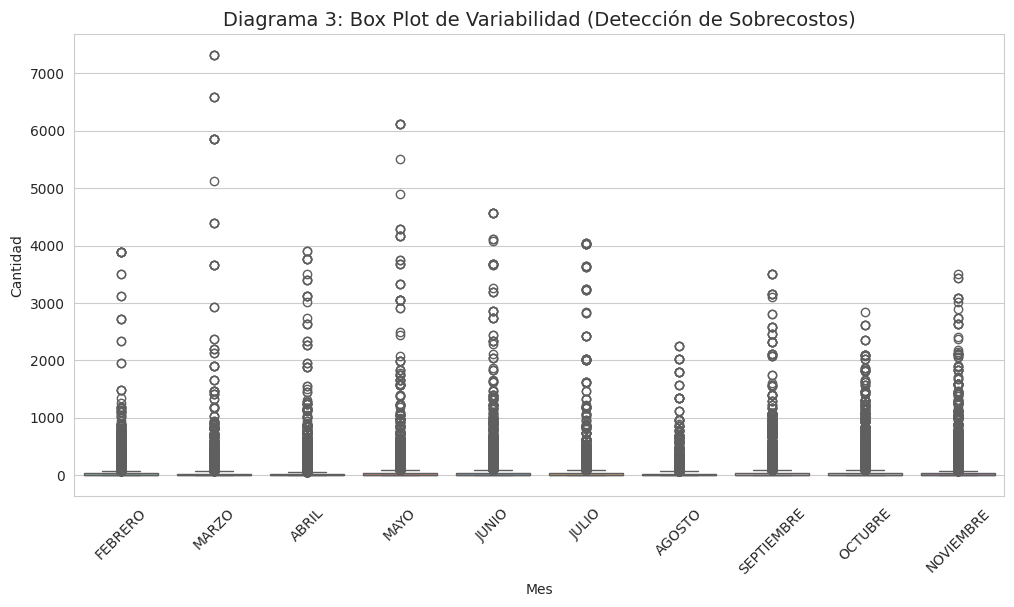

In [75]:
plt.figure(figsize=(12, 6))
# Solo graficamos donde hay demanda real (>0) para ver bien las cajas
sns.boxplot(data=df_final[df_final['Cantidad'] > 0], x='Mes', y='Cantidad', palette='Set3')

plt.title('Diagrama 3: Box Plot de Variabilidad (Detección de Sobrecostos)', fontsize=14)
plt.xticks(rotation=45)
plt.show()